In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('dataset_part_2.csv')
main_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


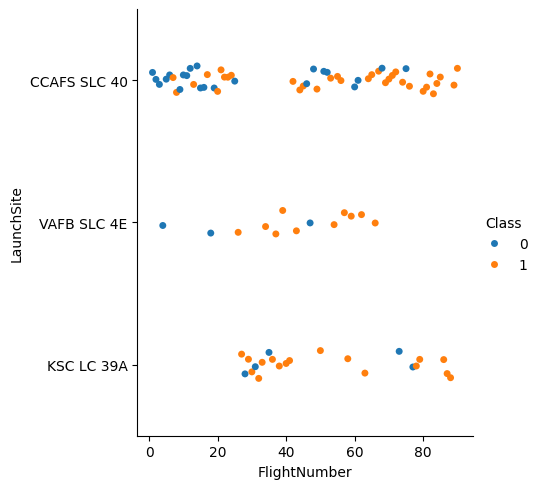

In [3]:
sns.catplot(x = main_df['FlightNumber'], y=main_df['LaunchSite'], hue=main_df['Class'])
plt.show()

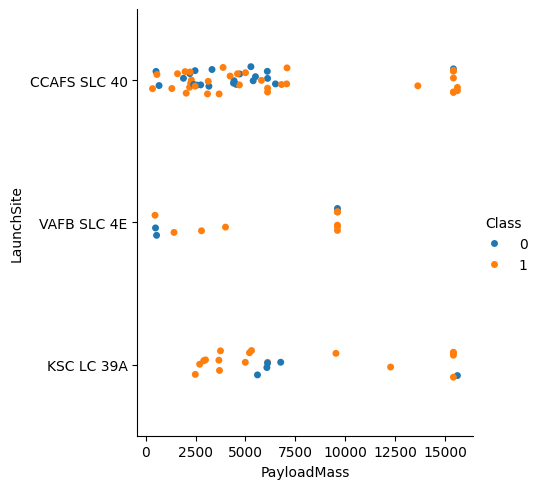

In [4]:
sns.catplot(x = main_df['PayloadMass'], y = main_df['LaunchSite'], hue = main_df['Class'])
plt.show()

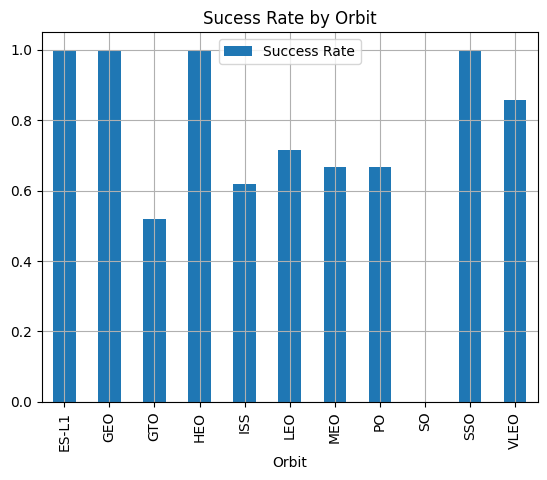

In [5]:
main_df[['Orbit','Class']].groupby('Orbit').mean().plot(kind='bar')
plt.title('Sucess Rate by Orbit')
plt.legend(['Success Rate'])
plt.grid(True)
plt.show()

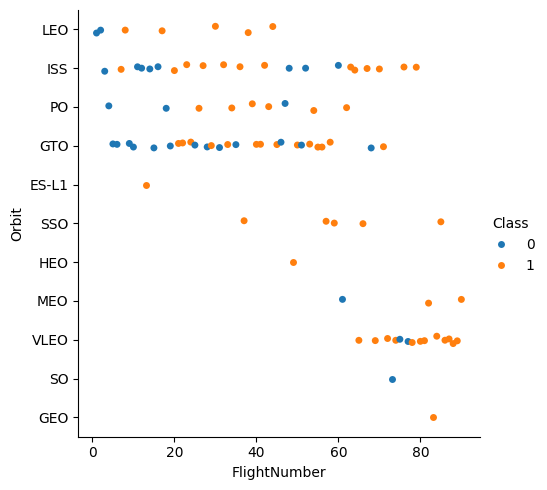

In [6]:
sns.catplot(x = main_df['FlightNumber'], y=main_df['Orbit'], hue=main_df['Class'])
plt.show()

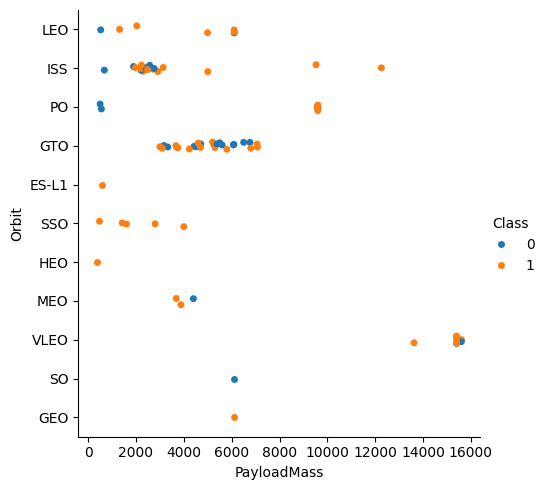

In [7]:
sns.catplot(x = main_df['PayloadMass'], y=main_df['Orbit'], hue=main_df['Class'])
plt.show()

In [8]:
year_series = pd.to_datetime(main_df['Date']).dt.year
main_df['Year'] = year_series
main_df[['Date','Year']].head()

,Date,Year
0,2010-06-04,2010
1,2012-05-22,2012
2,2013-03-01,2013
3,2013-09-29,2013
4,2013-12-03,2013


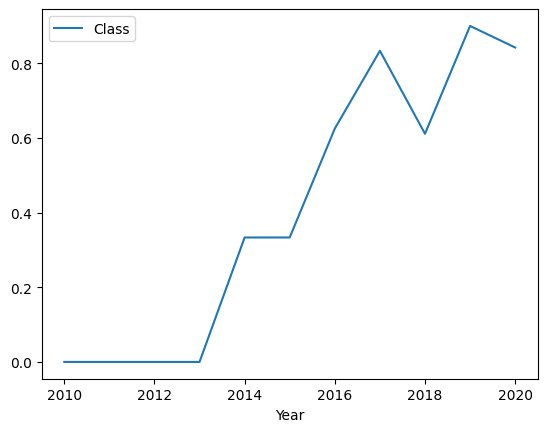

In [9]:
main_df[['Year','Class']].groupby('Year').mean().plot(kind='line')
plt.show()

In [10]:
features_df= main_df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
dummy_df = pd.get_dummies(features_df[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
dummy_df = dummy_df.astype(int)
dummy_df.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
features_df = pd.concat([features_df, dummy_df], axis=0)
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 89
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Orbit                                90 non-null     object 
 3   LaunchSite                           90 non-null     object 
 4   Flights                              90 non-null     float64
 5   GridFins                             90 non-null     object 
 6   Reused                               90 non-null     object 
 7   Legs                                 90 non-null     object 
 8   LandingPad                           64 non-null     object 
 9   Block                                90 non-null     float64
 10  ReusedCount                          90 non-null     float64
 11  Serial                               9

In [12]:
features_df = features_df.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis=1)
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     object 
 4   Reused                               90 non-null     object 
 5   Legs                                 90 non-null     object 
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                            9

In [13]:
features_df[['GridFins','Reused','Legs']] = features_df[['GridFins','Reused','Legs']].astype(float)
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                            9

In [14]:
features_df.to_csv('dataset_part_3.csv', index = None)